<a href="https://colab.research.google.com/github/harry418/EmotionRecog/blob/master/training/training_emo_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
data_train = '/content/gdrive/My Drive/emotion_recog/emo'

In [3]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 5.3MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
from fastai.vision.all import *
from fastai.vision import *
#from fastai.vision.core import *
from fastai.vision.data import *

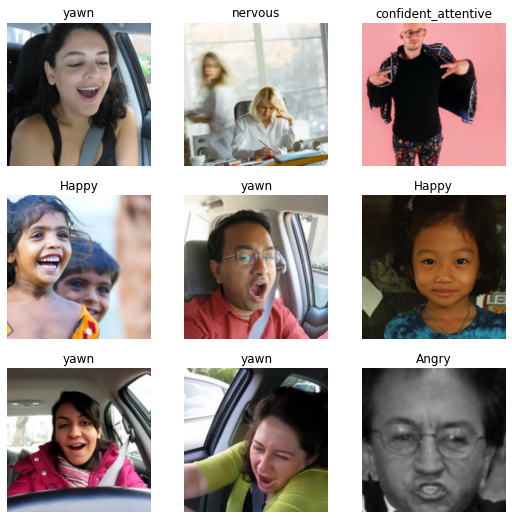

In [5]:
def label_func(fname):
    #label = str(fname).split(os.path.sep)[-2]
    return str(fname).split(os.path.sep)[-2]
    #return label
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_train)
dls.show_batch()

In [7]:
learner = cnn_learner(dls,models.resnet152,metrics=accuracy)
learner.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.597320,0.913153,0.769767,00:37


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,0.906571,0.807755,0.769767,00:46


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.3182567499825382e-06)

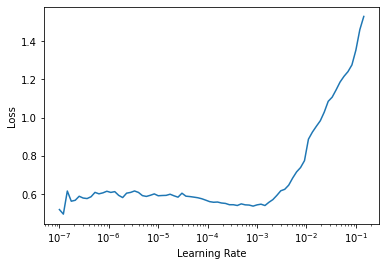

In [8]:
learner.lr_find()

In [9]:
learner.unfreeze()
learner.fit_one_cycle(10,lr_max=slice(1e-7,5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.604333,0.733918,0.800000,00:47
1,0.595250,0.839408,0.781395,00:46
2,0.554944,0.662350,0.820930,00:47
3,0.443041,0.657402,0.804651,00:46
4,0.348268,0.618115,0.834884,00:46
5,0.262352,0.628030,0.834884,00:46
6,0.201848,0.618192,0.841860,00:46
7,0.152748,0.638079,0.851163,00:46
8,0.120622,0.637268,0.853488,00:46
9,0.100198,0.642461,0.848837,00:46


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

In [13]:
learner.show_resutls()

AttributeError: ignored

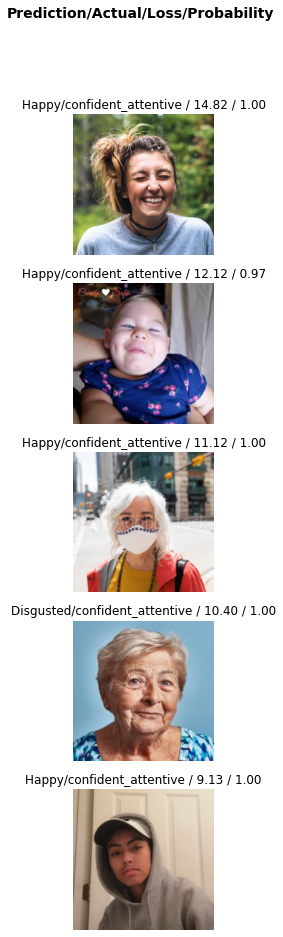

In [17]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(5, nrows=5)

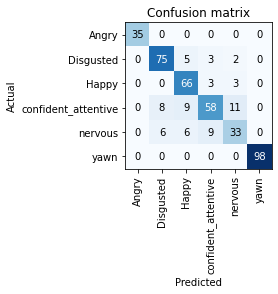

In [18]:
interp.plot_confusion_matrix()

In [22]:
learner.export('/content/gdrive/My Drive/emotion_recog/emo_fastai.pkl')

In [ ]:
# for loading model
 # use leaner = load_learner('/content/gdrive/My Drive/emotion_recog/emo_fastai.pkl')